### Imports

In [41]:
import cv2
import os
import numpy as np
import PIL
from PIL import Image
import seaborn as sns

#### links for future reference
https://stackoverflow.com/questions/47483951/how-to-define-a-threshold-value-to-detect-only-green-colour-objects-in-an-image

### Extract Frame from Given Video

In [1]:
#define all values
video_path = 'CAF00099-20210607T180842-190842.mp4'
directory = '/Users/graciezhang/Documents/Hengen-Lab/videos/video_analysis'
mouse = "KDR48"

In [43]:
#creates VideoCapture instance
vidcap = cv2.VideoCapture(video_path)

#if the frame is read correctly, it will be True
#video read in as BGR - blue, green, red
success, frame = vidcap.read()

#saves frame to specified directory
# os.chdir(directory)
for i in range(1):
    name = mouse + "_%d.jpg" % i
    cv2.imwrite(name, frame) 
    print('Read a new frame: ', success)
    success, frame = vidcap.read()

#can be adjusted to read a given # of frames

Read a new frame:  True


In [52]:
img_path = "99frame0"

### Isolating Color using OpenCV

In [53]:
#converts hsv to OpenCV range
def adjustHSVRange(h, s, v):
    #Normal H,S,V: (0-360,0-100%,0-100%)
    #OpenCV H,S,V: (0-180,0-255 ,0-255)
    return (180 * h / 360, 255 * s / 100, 255 * v / 100)

In [54]:
#function to isolate given color
def isolate_color(frame, lower, upper):
    #convert the BRG image to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    #convert the RGB image to HSV
    hsv = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2HSV)
    
    #threshold the HSV image to get only given color
    mask = cv2.inRange(hsv, lower, upper)
    
    #mask image so that only hsv values within certain range is kept
    res = cv2.bitwise_and(frame, frame, mask = mask)
    
    return mask, res

### LAB colors

Might be better for isolating colors. Reference: https://stackoverflow.com/questions/47483951/how-to-define-a-threshold-value-to-detect-only-green-colour-objects-in-an-image.

In [55]:
lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
a_channel = lab[:,:,1]
th = cv2.threshold(a_channel,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
res_lab = cv2.bitwise_and(frame, frame, mask = th)

### Test Isolation

In [56]:
#range for white color
# sensitivity = 100
# lower_white = np.array([0,0,255-sensitivity])
# upper_white = np.array([255,sensitivity,255])

# lower_white = np.array(adjustHSVRange(190.0, 4.8, 86.7))
# upper_white = np.array(adjustHSVRange(360, 100, 100))

# lower_white = np.array([60, 2, 150])
# upper_white = np.array([255, 255, 255])

In [57]:
#isolating green

#establishes range of colors to select
lower = (52, 35, 25)
upper = (70, 255,255)

mask, res = isolate_color(frame, lower, upper)

In [2]:
lower = np.array([60, 2, 150])
upper = np.array([255, 255, 255])

mask, res = isolate_color(img_path, lower, upper)

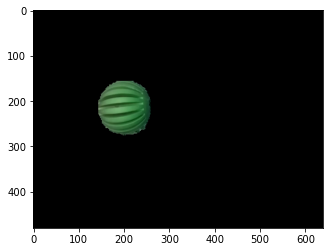

In [59]:
#generates image created from masking
img = Image.fromarray(res_lab, 'RGB')
img.show()

#colormap
plt.imshow(res_lab, cmap='gray')
plt.show()

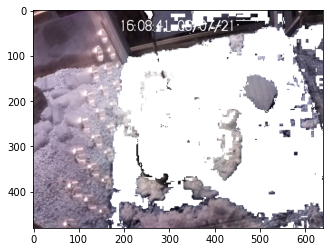

In [199]:
#change the background colors
#https://stackoverflow.com/questions/53988559/how-can-i-select-the-right-color-to-threshold-an-image-with-opencv

# # create a black image with the dimensions of the input image
# background = np.zeros(frame.shape, frame.dtype)
# # invert to create a white image
# background = cv2.bitwise_not(background)
# # invert the mask that blocks everything except green -
# # so now it only blocks the green area's
# mask_inv = cv2.bitwise_not(mask)
# # apply the inverted mask to the white image,
# # so it now has black where the original image had green
# masked_bg = cv2.bitwise_and(background,background, mask= mask_inv)
# # add the 2 images together. It adds all the pixel values, 
# # so the result is white background and the the green from the first image
# final = cv2.add(res, masked_bg)

### Heat Map

In [37]:
#shape of array
res_lab.shape

(480, 640, 3)

In [35]:
rows = res.shape[0]
cols = res.shape[1]
max_hsv = np.zeros(shape = (rows, cols))

In [38]:
#figure out how to skip tuples that are not zero
for x in range(0, rows):
    for y in range(0, cols):
        max_hsv[x][y] = np.amax(res_lab[x][y])

In [287]:
max_hsv

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

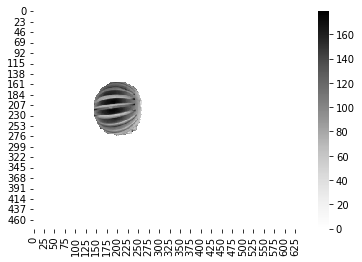

In [39]:
ax = sns.heatmap(max_hsv, cmap = "Greys")

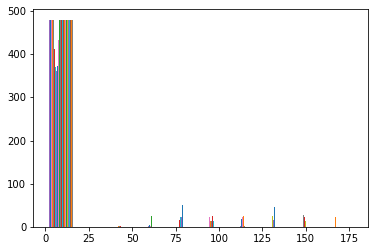

In [40]:
plt.hist(max_hsv)
plt.show()

### Junk Code - Just for testing + notes

In [292]:
import cv2
import numpy as np
import sys
import tkinter as tk
from tkinter import filedialog

image_hsv = None
pixel = (0,0,0) #RANDOM DEFAULT VALUE

ftypes = [
    ("JPG", "*.jpg;*.JPG;*.JPEG"), 
    ("PNG", "*.png;*.PNG"),
    ("GIF", "*.gif;*.GIF"),
    ("All files", "*.*")
]

def check_boundaries(value, tolerance, ranges, upper_or_lower):
    if ranges == 0:
        # set the boundary for hue
        boundary = 180
    elif ranges == 1:
        # set the boundary for saturation and value
        boundary = 255

    if(value + tolerance > boundary):
        value = boundary
    elif (value - tolerance < 0):
        value = 0
    else:
        if upper_or_lower == 1:
            value = value + tolerance
        else:
            value = value - tolerance
    return value

def pick_color(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        pixel = image_hsv[y,x]

        #HUE, SATURATION, AND VALUE (BRIGHTNESS) RANGES. TOLERANCE COULD BE ADJUSTED.
        # Set range = 0 for hue and range = 1 for saturation and brightness
        # set upper_or_lower = 1 for upper and upper_or_lower = 0 for lower
        hue_upper = check_boundaries(pixel[0], 10, 0, 1)
        hue_lower = check_boundaries(pixel[0], 10, 0, 0)
        saturation_upper = check_boundaries(pixel[1], 10, 1, 1)
        saturation_lower = check_boundaries(pixel[1], 10, 1, 0)
        value_upper = check_boundaries(pixel[2], 40, 1, 1)
        value_lower = check_boundaries(pixel[2], 40, 1, 0)

        upper =  np.array([hue_upper, saturation_upper, value_upper])
        lower =  np.array([hue_lower, saturation_lower, value_lower])
        print(lower, upper)

        #A MONOCHROME MASK FOR GETTING A BETTER VISION OVER THE COLORS 
        image_mask = cv2.inRange(image_hsv,lower,upper)
        cv2.imshow("Mask",image_mask)

def main():

    global image_hsv, pixel

    #OPEN DIALOG FOR READING THE IMAGE FILE
    root = tk.Tk()
    root.withdraw() #HIDE THE TKINTER GUI
    file_path = filedialog.askopenfilename(filetypes = ftypes)
    root.update()
    image_src = cv2.imread(file_path)
    cv2.imshow("BGR",image_src)

    #CREATE THE HSV FROM THE BGR IMAGE
    image_hsv = cv2.cvtColor(image_src,cv2.COLOR_BGR2HSV)
    cv2.imshow("HSV",image_hsv)

    #CALLBACK FUNCTION
    cv2.setMouseCallback("HSV", pick_color)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__=='__main__':
    main()

[ 43 153  74] [ 63 173 154]


In [ ]:
#function that allows for custom input - can be made to have more features later if needed
#https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html